In [82]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [4]:
train = pd.read_csv('clean_train_data.csv')
test = pd.read_csv('clean_test_data.csv')

In [46]:
train['target'].value_counts()

0    24720
1     7841
Name: target, dtype: int64

### SVM Model with whole data

In [7]:
X_train = train.drop(['target'], axis = 1)
y_train = train['target']
X_test = test.drop(['target'], axis = 1)
y_test = test['target']
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((32561, 25), (16281, 25), (32561,), (16281,))

In [32]:
svc_model = SVC()
svc_model.fit(X_train , y_train)
print('Score of SVM model is on whole data: ', svc_model.score(X_train , y_train))

Score of DC model is:  0.7591904425539756


In [34]:
# predict with created model on test data and print the evaluation metrics
svc_y_preds = svc_model.predict(X_test)
print(confusion_matrix(y_test , svc_y_preds) )
print(f'Accuracy of the model is: {accuracy_score(y_test ,svc_y_preds): 0.3f}')
print(f'Precision of the model is: {precision_score(y_test , svc_y_preds): 0.3f}')
print(f'Recall of the model is:    {recall_score(y_test ,svc_y_preds): 0.3f}')
print(f'F1-score of the model is:  {f1_score(y_test , svc_y_preds): 0.3f}')
print('Classification Report: \n',classification_report(y_test ,svc_y_preds))

[[12435     0]
 [ 3846     0]]
Accuracy of the model is:  0.764
Precision of the model is:  0.000
Recall of the model is:     0.000
F1-score of the model is:   0.000
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87     12435
           1       0.00      0.00      0.00      3846

    accuracy                           0.76     16281
   macro avg       0.38      0.50      0.43     16281
weighted avg       0.58      0.76      0.66     16281



C:\Users\Fatemeh\.conda\envs\anubrain-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fatemeh\.conda\envs\anubrain-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fatemeh\.conda\envs\anubrain-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fatemeh\.conda\e

### SVM Model oversampling with SMOTE

In [73]:
X_train = train.drop(['target'], axis = 1)
y_train = train['target']
smote = SMOTE(random_state=1)
X_train , y_train= smote.fit_resample(X_train , y_train)
y_train.value_counts()

0    24720
1    24720
Name: target, dtype: int64

In [74]:
svc_model = SVC()
svc_model.fit(X_train , y_train)
print('Score of SVM model is with oversampling: ', svc_model.score(X_train , y_train))

Score of DC model is:  0.5064724919093851


In [75]:
# predict with created model on test data and print the evaluation metrics
svc_y_preds = svc_model.predict(X_test)
print(confusion_matrix(y_test , svc_y_preds) )
print(f'Accuracy of the model is: {accuracy_score(y_test ,svc_y_preds): 0.3f}')
print(f'Precision of the model is: {precision_score(y_test , svc_y_preds): 0.3f}')
print(f'Recall of the model is:    {recall_score(y_test ,svc_y_preds): 0.3f}')
print(f'F1-score of the model is:  {f1_score(y_test , svc_y_preds): 0.3f}')
print('Classification Report: \n',classification_report(y_test ,svc_y_preds))

[[12435     0]
 [ 3846     0]]
Accuracy of the model is:  0.764
Precision of the model is:  0.000
Recall of the model is:     0.000
F1-score of the model is:   0.000
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87     12435
           1       0.00      0.00      0.00      3846

    accuracy                           0.76     16281
   macro avg       0.38      0.50      0.43     16281
weighted avg       0.58      0.76      0.66     16281



C:\Users\Fatemeh\.conda\envs\anubrain-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fatemeh\.conda\envs\anubrain-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fatemeh\.conda\envs\anubrain-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fatemeh\.conda\e

### SVM undersampling

In [42]:
train_c1 = train[train['target']==1]
train_c0 = train[train['target']==0].sample(train_c1.shape[0])
final_train = pd.concat([train_c1 , train_c0], axis = 0)

X_train = final_train.drop(['target'], axis = 1)
y_train = final_train['target']
X_test = test.drop(['target'], axis = 1)
y_test = test['target']
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((15682, 25), (16281, 25), (15682,), (16281,))

In [44]:
svc_model = SVC()
svc_model.fit(X_train , y_train)
print('Score of SVM modelwith undersampling is: ', svc_model.score(X_train , y_train))

Score of DC model is:  0.5061854355311822


In [45]:
# predict with created model on test data and print the evaluation metrics
svc_y_preds = svc_model.predict(X_test)
print(confusion_matrix(y_test , svc_y_preds) )
print(f'Accuracy of the model is: {accuracy_score(y_test ,svc_y_preds): 0.3f}')
print(f'Precision of the model is: {precision_score(y_test , svc_y_preds): 0.3f}')
print(f'Recall of the model is:    {recall_score(y_test ,svc_y_preds): 0.3f}')
print(f'F1-score of the model is:  {f1_score(y_test , svc_y_preds): 0.3f}')
print('Classification Report: \n',classification_report(y_test ,svc_y_preds))

[[12435     0]
 [ 3846     0]]
Accuracy of the model is:  0.764
Precision of the model is:  0.000
Recall of the model is:     0.000
F1-score of the model is:   0.000
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87     12435
           1       0.00      0.00      0.00      3846

    accuracy                           0.76     16281
   macro avg       0.38      0.50      0.43     16281
weighted avg       0.58      0.76      0.66     16281



C:\Users\Fatemeh\.conda\envs\anubrain-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fatemeh\.conda\envs\anubrain-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fatemeh\.conda\envs\anubrain-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fatemeh\.conda\e

**The result shows SVM can not perform well in this data even after dwonsampling**

## Logistic Regression

In [47]:
X_train = train.drop(['target'], axis = 1)
y_train = train['target']
X_test = test.drop(['target'], axis = 1)
y_test = test['target']
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((32561, 25), (16281, 25), (32561,), (16281,))

In [48]:
lg_model = LogisticRegression()
lg_model.fit(X_train , y_train)
lg_model.score(X_train , y_train)

0.7640428733761249

In [49]:
# predict with created model on test data and print the evaluation metrics
lg_y_preds = lg_model.predict(X_test)
print(confusion_matrix(y_test , lg_y_preds) )
print(f'Accuracy of the model is: {accuracy_score(y_test ,lg_y_preds): 0.3f}')
print(f'Precision of the model is: {precision_score(y_test , lg_y_preds): 0.3f}')
print(f'Recall of the model is:    {recall_score(y_test ,lg_y_preds): 0.3f}')
print(f'F1-score of the model is:  {f1_score(y_test , lg_y_preds): 0.3f}')
print('Classification Report: \n',classification_report(y_test ,lg_y_preds))

[[12416    19]
 [ 3803    43]]
Accuracy of the model is:  0.765
Precision of the model is:  0.694
Recall of the model is:     0.011
F1-score of the model is:   0.022
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87     12435
           1       0.69      0.01      0.02      3846

    accuracy                           0.77     16281
   macro avg       0.73      0.50      0.44     16281
weighted avg       0.75      0.77      0.67     16281



### LR with whole data: The model has bais toward majority class the recall metric is dwon**

In [50]:
train_c1 = train[train['target']==1]
train_c0 = train[train['target']==0].sample(train_c1.shape[0])
final_train = pd.concat([train_c1 , train_c0], axis = 0)

X_train = final_train.drop(['target'], axis = 1)
y_train = final_train['target']
X_test = test.drop(['target'], axis = 1)
y_test = test['target']
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((15682, 25), (16281, 25), (15682,), (16281,))

In [51]:
lg_model = LogisticRegression()
lg_model.fit(X_train , y_train)
lg_model.score(X_train , y_train)

0.7565999234791481

In [52]:
# predict with created model on test data and print the evaluation metrics
lg_y_preds = lg_model.predict(X_test)
print(confusion_matrix(y_test , lg_y_preds) )
print(f'Accuracy of the model is: {accuracy_score(y_test ,lg_y_preds): 0.3f}')
print(f'Precision of the model is: {precision_score(y_test , lg_y_preds): 0.3f}')
print(f'Recall of the model is:    {recall_score(y_test ,lg_y_preds): 0.3f}')
print(f'F1-score of the model is:  {f1_score(y_test , lg_y_preds): 0.3f}')
print('Classification Report: \n',classification_report(y_test ,lg_y_preds))

[[8564 3871]
 [ 627 3219]]
Accuracy of the model is:  0.724
Precision of the model is:  0.454
Recall of the model is:     0.837
F1-score of the model is:   0.589
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.69      0.79     12435
           1       0.45      0.84      0.59      3846

    accuracy                           0.72     16281
   macro avg       0.69      0.76      0.69     16281
weighted avg       0.82      0.72      0.74     16281



### LR with undersampling: The model train better but the ccuracy is down and model can not generilze in a good way

In [56]:
X_train = train.drop(['target'], axis = 1)
y_train = train['target']
smote = SMOTE(random_state=1)
X_train , y_train= smote.fit_resample(X_train , y_train)
y_train.value_counts()

0    24720
1    24720
Name: target, dtype: int64

In [59]:
lg_model = LogisticRegression()
lg_model.fit(X_train , y_train)
lg_model.score(X_train , y_train)

0.8499797734627832

In [58]:
# predict with created model on test data and print the evaluation metrics
lg_y_preds = lg_model.predict(X_test)
print(confusion_matrix(y_test , lg_y_preds) )
print(f'Accuracy of the model is: {accuracy_score(y_test ,lg_y_preds): 0.3f}')
print(f'Precision of the model is: {precision_score(y_test , lg_y_preds): 0.3f}')
print(f'Recall of the model is:    {recall_score(y_test ,lg_y_preds): 0.3f}')
print(f'F1-score of the model is:  {f1_score(y_test , lg_y_preds): 0.3f}')
print('Classification Report: \n',classification_report(y_test ,lg_y_preds))

[[10690  1745]
 [ 1448  2398]]
Accuracy of the model is:  0.804
Precision of the model is:  0.579
Recall of the model is:     0.624
F1-score of the model is:   0.600
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     12435
           1       0.58      0.62      0.60      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.74      0.74     16281
weighted avg       0.81      0.80      0.81     16281



### LR Oversampling with SMOTE: The model train better than those previouse models and oversamplig help model to train in a better way and get higher accuracy 

## Decition Tree

### Decision Tree is not so much sensitive toward imbalanced data, let check the result

In [78]:
X_train = train.drop(['target'], axis = 1)
y_train = train['target']
y_train.value_counts()

0    24720
1     7841
Name: target, dtype: int64

In [79]:
dc_model = DecisionTreeClassifier()
dc_model.fit(X_train , y_train)
print('Score of DC model is: ', dc_model.score(X_train , y_train))

Score of DC model is:  1.0


In [80]:
# predict with created model on test data and print the evaluation metrics
dc_y_pred = dc_model.predict(X_test)
print(confusion_matrix(y_test , dc_y_pred) )
print(f'Accuracy of the model is: {accuracy_score(y_test ,dc_y_pred): 0.3f}')
print(f'Precision of the model is: {precision_score(y_test , dc_y_pred): 0.3f}')
print(f'Recall of the model is:    {recall_score(y_test ,dc_y_pred): 0.3f}')
print(f'F1-score of the model is:  {f1_score(y_test , dc_y_pred): 0.3f}')
print('Classification Report: \n',classification_report(y_test ,dc_y_pred))

[[10823  1612]
 [ 1528  2318]]
Accuracy of the model is:  0.807
Precision of the model is:  0.590
Recall of the model is:     0.603
F1-score of the model is:   0.596
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87     12435
           1       0.59      0.60      0.60      3846

    accuracy                           0.81     16281
   macro avg       0.73      0.74      0.73     16281
weighted avg       0.81      0.81      0.81     16281



### Decision Tree: is it clear this model can perform well on whole data and the result is similar to the LR with over sampling 

## Hyperparameter tunning

In [87]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}

dc_model = DecisionTreeClassifier()
grid_model = GridSearchCV(estimator=dc_model,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')

# fitting the model for grid search 
grid_model.fit(X_train, y_train) 

# best parameter
print('\nBeat parameters are: ' , grid_model.best_params_) 

y_preds = grid_model.predict(X_test)
print(confusion_matrix(y_test , y_preds),'\n' )
print(f'Accuracy of the model is: {accuracy_score(y_test ,y_preds): 0.3f}')
print(f'Precision of the model is: {precision_score(y_test ,y_preds): 0.3f}')
print(f'Recall of the model is:    {recall_score(y_test ,y_preds): 0.3f}')
print(f'F1-score of the model is:  {f1_score(y_test , y_preds): 0.3f}')
print('Classification Report: \n',classification_report(y_test ,y_preds))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits

Beat parameters are:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
[[11949   486]
 [ 1842  2004]] 

Accuracy of the model is:  0.857
Precision of the model is:  0.805
Recall of the model is:     0.521
F1-score of the model is:   0.633
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     12435
           1       0.80      0.52      0.63      3846

    accuracy                           0.86     16281
   macro avg       0.84      0.74      0.77     16281
weighted avg       0.85      0.86      0.85     16281



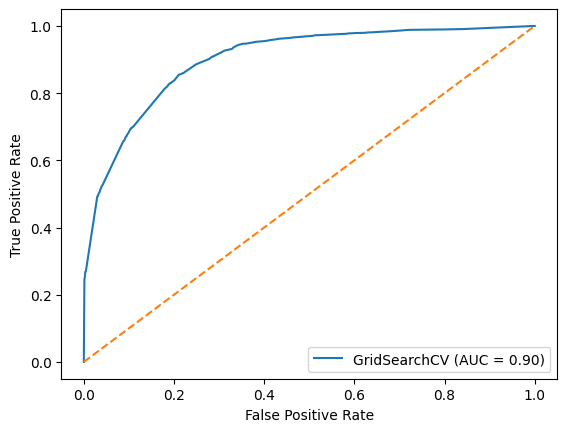

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

dc_disp = RocCurveDisplay.from_estimator(grid_model, X_test, y_test)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()